In [ ]:
!pip install basedosdados

     |████████████████████████████████| 101 kB 7.5 MB/s 
     |████████████████████████████████| 187 kB 52.0 MB/s 
     |████████████████████████████████| 125 kB 63.6 MB/s 
     |████████████████████████████████| 70 kB 10.1 MB/s 
     |████████████████████████████████| 9.9 MB 42.2 MB/s 
     |████████████████████████████████| 88 kB 9.2 MB/s 
     |████████████████████████████████| 75 kB 5.7 MB/s 
     |████████████████████████████████| 546 kB 57.3 MB/s 
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 0.4.1
    Uninstalling google-resumable-media-0.4.1:
      Successfully uninstalled google-resumable-media-0.4.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uni

In [ ]:
import basedosdados as bd
import pandas as pd
import numpy as np

In [ ]:
query = """
SELECT id_regiao, id_escola, media_lp_leitura, media_lp_escrita, media_mt
FROM `basedosdados.br_inep_ana.escola`
WHERE ano = 2016
"""

In [ ]:
escola = bd.read_sql(query, billing_project_id='basedosdados-input')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=gP2fs7QrnWEivWKdg06zxUU6LLkNnl&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWj-KmkheStMENzGVGE_svCen31fJX615ps4b7FaNY4WPSwSH2Yyyfk


Downloading: 100%|██████████| 48717/48717 [00:01<00:00, 40903.89rows/s]


In [ ]:
value_vars = ['media_lp_leitura', 'media_lp_escrita', 'media_mt']
notas_melt = pd.melt(escola, id_vars=['id_regiao', 'id_escola'], value_vars=value_vars, var_name='prova', value_name='valor')
notas_melt['valor'] = notas_melt['valor'].astype('float64')
notas_melt.dropna(inplace=True)

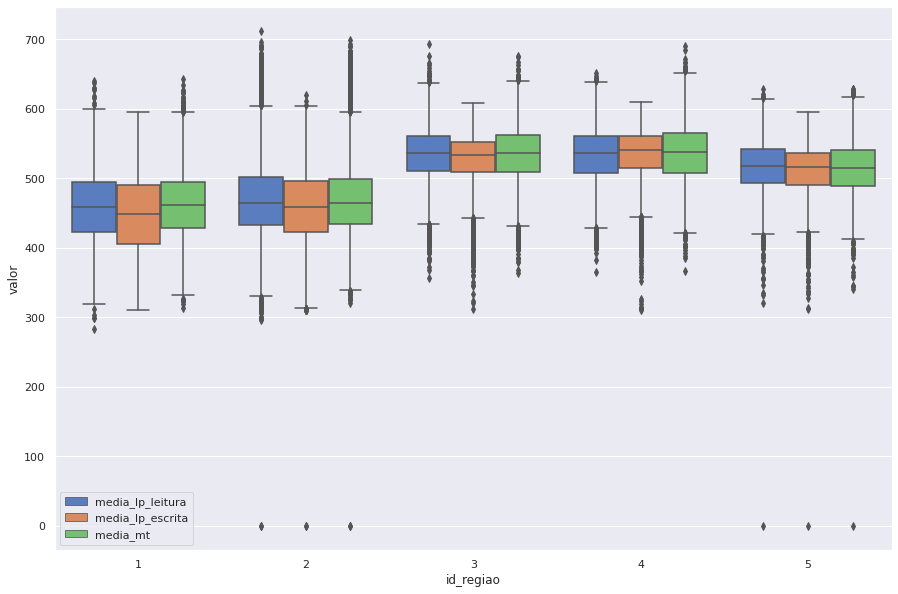

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set()
 
# Grouped violinplot
fig = plt.figure(figsize=(15,10))
sns.color_palette("hls", 8)
sns.boxplot(x="id_regiao", y="valor", hue="prova", data=notas_melt, palette='muted')
plt.legend(loc='lower left')
plt.show()
fig.savefig('correlacao.svg', transparent=True, dpi=300)